In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
data = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/Volve%20P-12_DatesCorrected.csv',
                 index_col=0, parse_dates=True)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2007-01-09 to 2016-01-12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onstreaminject_HRS              3291 non-null   float64
 1   BORE_WI_VOL                     3291 non-null   int64  
 2   ON_STREAM_HRS                   3291 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 5   AVG_DP_TUBING                   3291 non-null   float64
 6   AVG_ANNULUS_PRESS               3291 non-null   float64
 7   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 8   AVG_WHP_P                       3291 non-null   float64
 9   AVG_WHT_P                       3291 non-null   float64
 10  DP_CHOKE_SIZE                   3291 non-null   float64
 11  BORE_OIL_VOL                    3291 non-null   float64
 12  BORE_GAS_VOL    

In this dataset which is regarding oil production from well, the target is Bore_oil_vol which should be predicted in the next year using machine learning and input features

In [66]:
# checking missing data 
data.isna().sum()

onstreaminject_HRS                0
BORE_WI_VOL                       0
ON_STREAM_HRS                     0
AVG_DOWNHOLE_PRESSURE             0
AVG_DOWNHOLE_TEMPERATURE          0
AVG_DP_TUBING                     0
AVG_ANNULUS_PRESS                 0
AVG_CHOKE_SIZE_P in percentage    0
AVG_WHP_P                         0
AVG_WHT_P                         0
DP_CHOKE_SIZE                     0
BORE_OIL_VOL                      0
BORE_GAS_VOL                      0
BORE_WAT_VOL                      0
dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

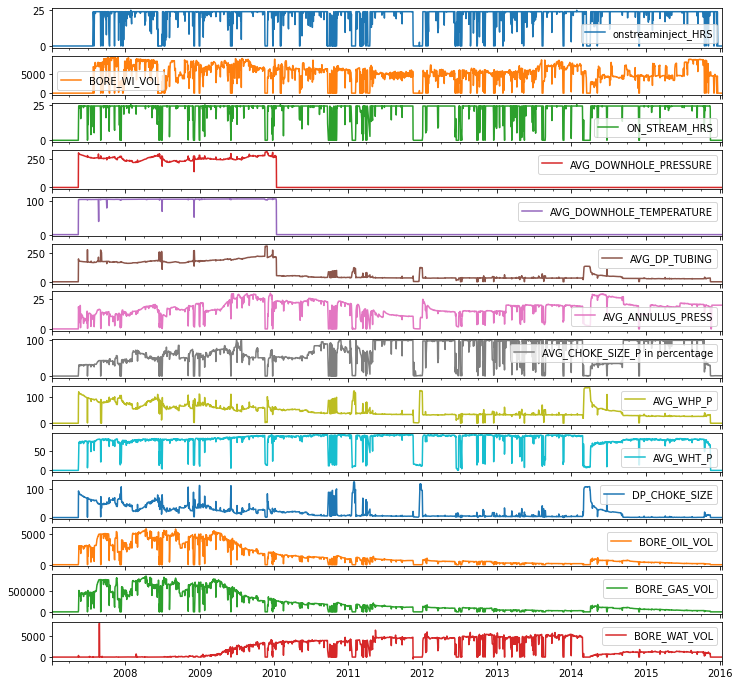

In [67]:
data.plot(subplots=True,figsize=(12,12))

according to the plot bore_oil_vol will be increased until 2009 and then it started to decrease until 2014 . Gas_vol followed the same patter since it is highly correlated to the oild production. Moreover we have a spike from 2014, due to the fact that chocke size in he previous year(2014 and before) was closed but after 2014 by decreasing the pressure of well this value has increase so Oil_vol also increased and witnessed a spike at this year.

### Finding Highly correlated features (Solving multicollinearity)

<AxesSubplot:>

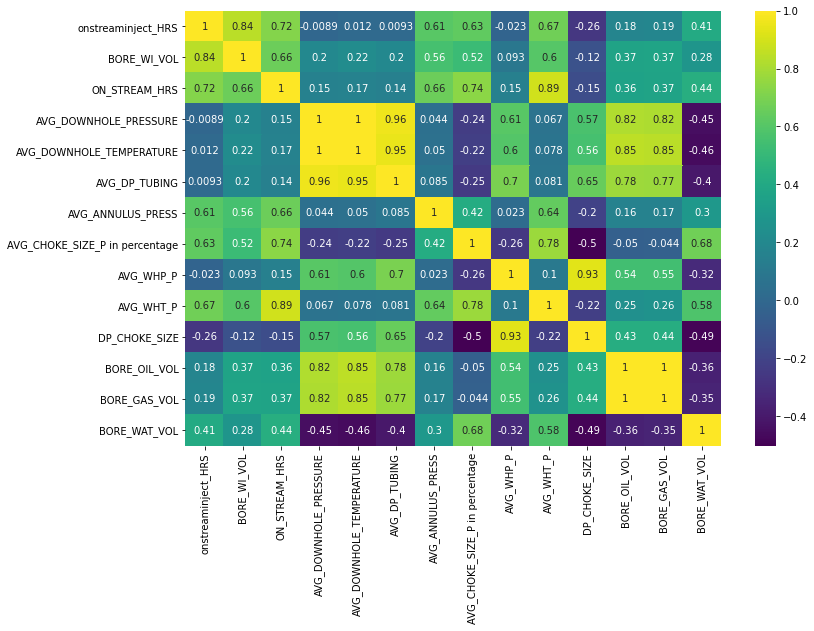

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

Firstly we assume that this data the output target (y or bore_oil_vol) is linearly related to input features (X), then in this assumption we need to remove those features have high correlation because it means that we are using reopeated  and duplicate features which can reduce the accuracy of model.

In [69]:
data.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

<AxesSubplot:>

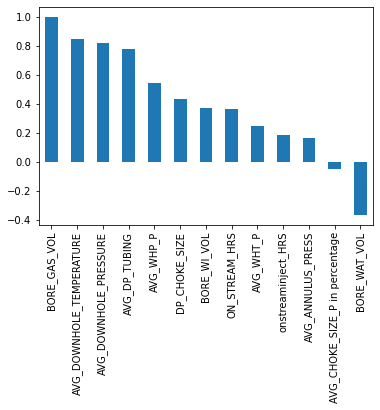

In [70]:
data.corr()['BORE_OIL_VOL'].sort_values(ascending=False)[1:].plot(kind='bar')

In [71]:
correlation = pd.DataFrame(data.corr()['BORE_OIL_VOL'].sort_values(ascending=False)[1:])
correlation.columns = ['corr']
correlation

,corr
BORE_GAS_VOL,0.998661
AVG_DOWNHOLE_TEMPERATURE,0.850241
AVG_DOWNHOLE_PRESSURE,0.819920
AVG_DP_TUBING,0.778941
AVG_WHP_P,0.544204
DP_CHOKE_SIZE,0.434375
BORE_WI_VOL,0.368739
ON_STREAM_HRS,0.361124
AVG_WHT_P,0.245750
onstreaminject_HRS,0.182405


In [72]:
input_features = correlation[(abs(correlation['corr'])>0.2) & (correlation['corr']<0.9)].index
input_features

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

### Jump to Machine Learning Model

In [73]:
x = data[input_features]
y = data['BORE_OIL_VOL'].fillna(0)


In [74]:
train_length = 3000

x_train,y_train = x.iloc[:train_length,:] , y.iloc[:train_length]

x_test,y_test = x.iloc[train_length:,:] , y.iloc[train_length:]

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

y_hat_train = lr.predict(x_train_scaled)
y_hat_test = lr.predict(x_test_scaled)

r2_train = lr.score(x_train_scaled,y_train)
print('r squared of train data is :',r2_train)
r2_test = lr.score(x_test_scaled,y_test)
print('r squared of test data is :',r2_test)

r squared of train data is : 0.8551151690410929
r squared of test data is : -73.3011860024612


As obvious from the results of r squared, although the model could predeict the traiun data good to some extent, the resutls for tets data is awful and this model must be improved. There are a lot of reason behind this:
for instance so far we did not check the multicollinearity of model, or we didd not any regularization. moreover the model could be non-linear while our assumption was that we are working with linear one. So we need to refine the model by implementing and cheking them.

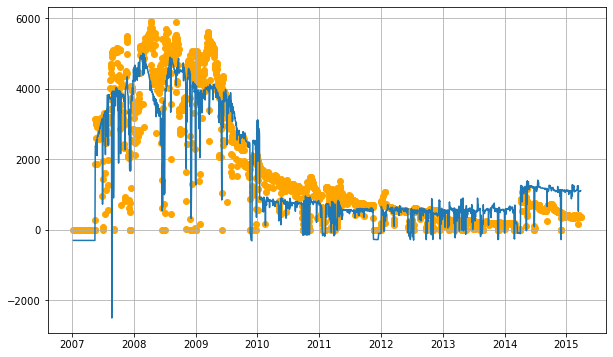

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(data.index[:train_length],y_train,color = 'orange')
plt.plot(data.index[:train_length],y_hat_train)
plt.grid()

The plot also proves that out model is not working properly since in some years we have negative oil production!! Absolutely it is impossible to do something like this (at least for me :D)

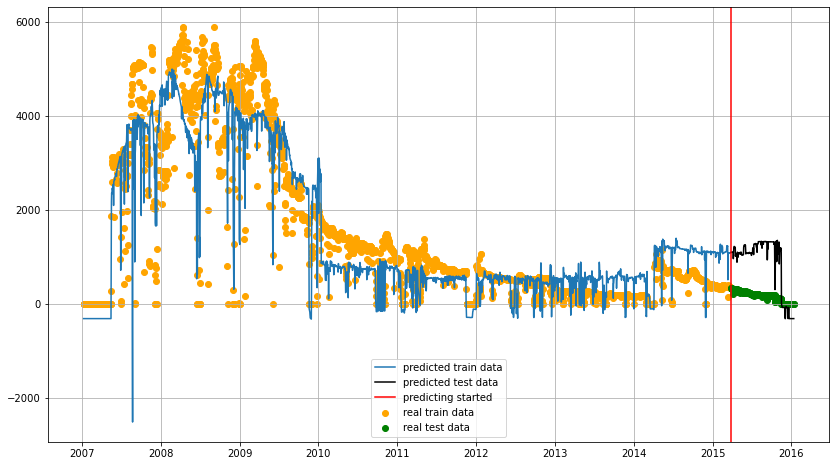

In [78]:
# now let's plot the results for Train/Test data together:

plt.figure(figsize=(14,8))
plt.scatter(data.index[:train_length],y_train,color = 'orange',label='real train data')
plt.plot(data.index[:train_length],y_hat_train,label='predicted train data')

plt.scatter(data.index[train_length:],y_test,color = 'green',label='real test data')
plt.plot(data.index[train_length:],y_hat_test,color='black',label='predicted test data')
plt.axvline(data.index[train_length],color='red',label='predicting started')
plt.legend(loc='best')
plt.grid()

Let's try another ML model without implementing egularization,..... to see the errors and results. 

## Random Forest


In [79]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300)
rf.fit(x_train_scaled,y_train)
y_hat_train_rf = rf.predict(x_train_scaled)
y_hat_test_rf = rf.predict(x_test_scaled)

r2_train_rf = rf.score(x_train_scaled,y_train)
r2_test_rf = rf.score(x_test_scaled,y_test)

In [80]:
r2_test_rf

-1.839440256451455

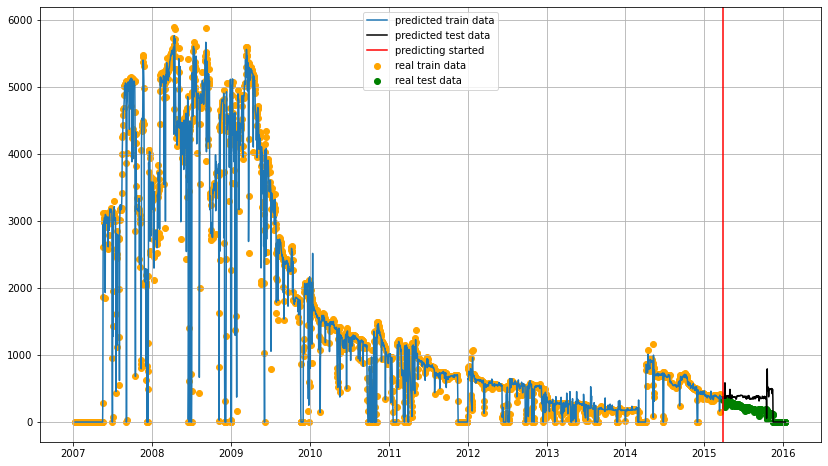

In [81]:
# now let's plot the results for Train/Test data together:

plt.figure(figsize=(14,8))
plt.scatter(data.index[:train_length],y_train,color = 'orange',label='real train data')
plt.plot(data.index[:train_length],y_hat_train_rf,label='predicted train data')

plt.scatter(data.index[train_length:],y_test,color = 'green',label='real test data')
plt.plot(data.index[train_length:],y_hat_test_rf,color='black',label='predicted test data')
plt.axvline(data.index[train_length],color='red',label='predicting started')
plt.legend(loc='best')
plt.grid()

This time according to the plot there is not any negative oil prodcution, but if you see the resutls obtaind from R2, we have much errors in the results so this time also the model is not working properly. it is better than previous model but not prefect yet.

## Finding Outliers

In [146]:
from collections import Counter
def detect(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5*IQR
        outlier_list_col = df[(df[col]<outlier_step-IQR)|(df[col]>outlier_step+IQR)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v>n)
    return multiple_outliers

In [147]:
out_to_drop = detect (data,12,data.columns)
out_to_drop

[Timestamp('2007-01-09 00:00:00'),
 Timestamp('2007-01-10 00:00:00'),
 Timestamp('2007-01-11 00:00:00'),
 Timestamp('2007-01-12 00:00:00'),
 Timestamp('2007-01-13 00:00:00'),
 Timestamp('2007-01-14 00:00:00'),
 Timestamp('2007-01-15 00:00:00'),
 Timestamp('2007-01-16 00:00:00'),
 Timestamp('2007-01-17 00:00:00'),
 Timestamp('2007-01-18 00:00:00'),
 Timestamp('2007-01-19 00:00:00'),
 Timestamp('2007-01-20 00:00:00'),
 Timestamp('2007-01-21 00:00:00'),
 Timestamp('2007-01-22 00:00:00'),
 Timestamp('2007-01-23 00:00:00'),
 Timestamp('2007-01-24 00:00:00'),
 Timestamp('2007-01-25 00:00:00'),
 Timestamp('2007-01-26 00:00:00'),
 Timestamp('2007-01-27 00:00:00'),
 Timestamp('2007-01-28 00:00:00'),
 Timestamp('2007-01-29 00:00:00'),
 Timestamp('2007-01-30 00:00:00'),
 Timestamp('2007-01-31 00:00:00'),
 Timestamp('2007-02-01 00:00:00'),
 Timestamp('2007-02-02 00:00:00'),
 Timestamp('2007-02-03 00:00:00'),
 Timestamp('2007-02-04 00:00:00'),
 Timestamp('2007-02-05 00:00:00'),
 Timestamp('2007-02-

In [148]:
new_data = data.drop(out_to_drop,axis=0)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3159 entries, 2007-05-17 to 2016-01-12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onstreaminject_HRS              3159 non-null   float64
 1   BORE_WI_VOL                     3159 non-null   int64  
 2   ON_STREAM_HRS                   3159 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE           3159 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE        3159 non-null   float64
 5   AVG_DP_TUBING                   3159 non-null   float64
 6   AVG_ANNULUS_PRESS               3159 non-null   float64
 7   AVG_CHOKE_SIZE_P in percentage  3159 non-null   float64
 8   AVG_WHP_P                       3159 non-null   float64
 9   AVG_WHT_P                       3159 non-null   float64
 10  DP_CHOKE_SIZE                   3159 non-null   float64
 11  BORE_OIL_VOL                    3159 non-null   float64
 12  BORE_GAS_VOL    

In [149]:
train_length = 2000

x = new_data.drop('BORE_OIL_VOL',axis=1)
y = new_data['BORE_OIL_VOL'].fillna(0)

x_train,y_train = x.iloc[:train_length,:] , y.iloc[:train_length]

x_test,y_test = x.iloc[train_length:,:] , y.iloc[train_length:]


In [150]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_hat_train = lr.predict(x_train)
y_hat_test = lr.predict(x_test)

r2_train = lr.score(x_train,y_train)
print('r squared of train data is :',r2_train)
r2_test = lr.score(x_test,y_test)
print('r squared of test data is :',r2_test)

r squared of train data is : 0.9977422790097351
r squared of test data is : 0.696032604848845


<AxesSubplot:>

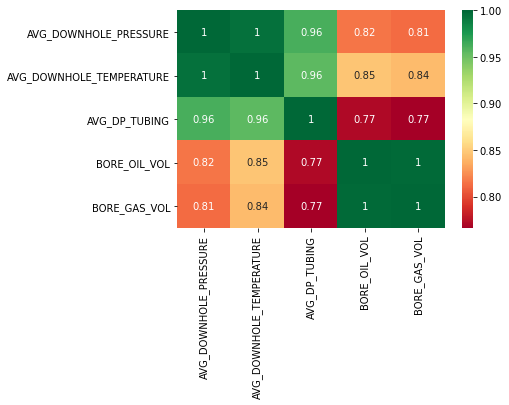

In [151]:
cormat = new_data.corr()
top_cor_features = cormat.index[abs(cormat['BORE_OIL_VOL'])>0.6]
plt.figure()
sns.heatmap(new_data[top_cor_features].corr(),annot=True,cmap = 'RdYlGn')

In [152]:
#new_data = new_data.drop('BORE_GAS_VOL',axis=1)
new_data.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = new_data.drop('BORE_OIL_VOL',axis=1)
y = new_data['BORE_OIL_VOL'].fillna(0)
vif_data=pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range (len(x.columns)) ]
vif_data.sort_values('VIF',ascending=False)

,features,VIF
4,AVG_DOWNHOLE_TEMPERATURE,284.231161
3,AVG_DOWNHOLE_PRESSURE,266.558851
8,AVG_WHP_P,197.581056
9,AVG_WHT_P,102.388967
10,DP_CHOKE_SIZE,78.497250
2,ON_STREAM_HRS,54.246189
5,AVG_DP_TUBING,44.783765
0,onstreaminject_HRS,30.265157
7,AVG_CHOKE_SIZE_P in percentage,23.269290
1,BORE_WI_VOL,19.403930


In [154]:
x = x.drop(['AVG_DOWNHOLE_PRESSURE','AVG_WHP_P','AVG_WHT_P','ON_STREAM_HRS'],axis=1)

In [155]:
vif_data=pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range (len(x.columns)) ]
vif_data.sort_values('VIF',ascending=False)

,features,VIF
3,AVG_DP_TUBING,38.203366
2,AVG_DOWNHOLE_TEMPERATURE,29.019224
0,onstreaminject_HRS,27.596811
1,BORE_WI_VOL,18.937088
5,AVG_CHOKE_SIZE_P in percentage,11.828139
4,AVG_ANNULUS_PRESS,10.039266
7,BORE_GAS_VOL,7.834629
8,BORE_WAT_VOL,5.447852
6,DP_CHOKE_SIZE,3.979510


In [156]:
train_length = 2000


x_train,y_train = x.iloc[:train_length,:] , y.iloc[:train_length]
x_test,y_test = x.iloc[train_length:,:] , y.iloc[train_length:]

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

y_hat_train = lr.predict(x_train_scaled)
y_hat_test = lr.predict(x_test_scaled)

r2_train = lr.score(x_train_scaled,y_train)
print('r squared of train data is :',r2_train)
r2_test = lr.score(x_test_scaled,y_test)
print('r squared of test data is :',r2_test)
x

r squared of train data is : 0.9973994369855126
r squared of test data is : 0.5800341544522658


,onstreaminject_HRS,BORE_WI_VOL,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
2007-05-17,0.0,0,104.418,201.250,18.640,14.48443,92.475,38889.0,385.0
2007-05-18,0.0,0,105.403,182.145,16.467,22.83299,89.620,285246.0,7.0
2007-05-19,0.0,0,105.775,181.868,12.660,31.24997,80.120,509955.0,1.0
2007-05-20,0.0,0,105.752,180.832,5.264,28.51893,84.251,383427.0,1.0
2007-05-21,0.0,0,105.811,180.501,12.385,30.22790,82.359,418474.0,5.0
...,...,...,...,...,...,...,...,...,...
2016-01-08,0.0,0,0.000,0.000,19.959,0.90339,0.026,0.0,0.0
2016-01-09,0.0,0,0.000,0.000,19.959,0.90339,0.026,0.0,0.0
2016-01-10,0.0,0,0.000,0.000,19.959,0.90339,0.026,0.0,0.0
2016-01-11,0.0,0,0.000,0.000,19.959,0.90339,0.026,0.0,0.0


In [157]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=[0.01,0.1,0.2,3,0.15,0.17,0.18,0.19,0.2,0.25,0.3,0.4,0.45,0.5,0.6,0.95,1,1.1,2,4,10,20,40,41,45,50,60,65])
ridge.fit(x_train_scaled,y_train)

alpha = ridge.alpha_
alpha

0.01

In [158]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(x_train_scaled,y_train)
predict_train = ridge.predict(x_train_scaled)
predict_test = ridge.predict(x_test_scaled)
r2= ridge.score(x_test_scaled,y_test)
r2

0.579845389745717

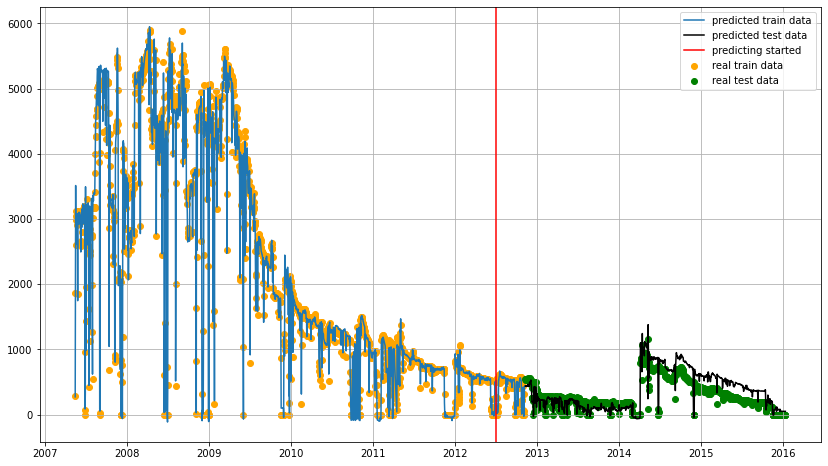

In [159]:

plt.figure(figsize=(14,8))
plt.scatter(x.index[:train_length],y_train,color = 'orange',label='real train data')
plt.plot(x.index[:train_length],predict_train,label='predicted train data')

plt.scatter(x.index[train_length:],y_test,color = 'green',label='real test data')
plt.plot(x.index[train_length:],predict_test,color='black',label='predicted test data')
plt.axvline(data.index[train_length],color='red',label='predicting started')
plt.legend(loc='best')
plt.grid()